# 決定木モデルの作成(rpart)

## rpartを用いて決定木モデルを作成する

In [1]:
#使用ライブラリ
import pandas as pd
from sklearn import tree
from sklearn.metrics import (roc_curve, auc, accuracy_score)

import pydotplus as pdp
from IPython.display import Image

## データ読込

In [2]:
train = pd.read_csv(filepath_or_buffer = "/home/y-toyoda/data/bank/train.csv")
test = pd.read_csv(filepath_or_buffer = "/home/y-toyoda/data/bank/test.csv")

## 決定木モデル作成

In [3]:
# 可視化のため目的変数の型をファクターに変換 →　今回は不要
#train.y = train.y.astype('object')

#sklearn の tree だとカテゴリ変数は扱えないため、ダミー変数に置き換え
train_dummy = pd.get_dummies(train)

#決定木モデル作成
tree_model = tree.DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=500,
    criterion='gini'
).fit(train_dummy.drop('y', axis=1), train_dummy.y)

#構築データでのAUC
#モデルの当てはめ
pred_train = tree_model.predict(train_dummy.drop('y', axis=1))
fpr, tpr, thresholds = roc_curve(train['y'], pred_train, pos_label=1)
#AUC
auc(fpr, tpr)

0.656859182262748

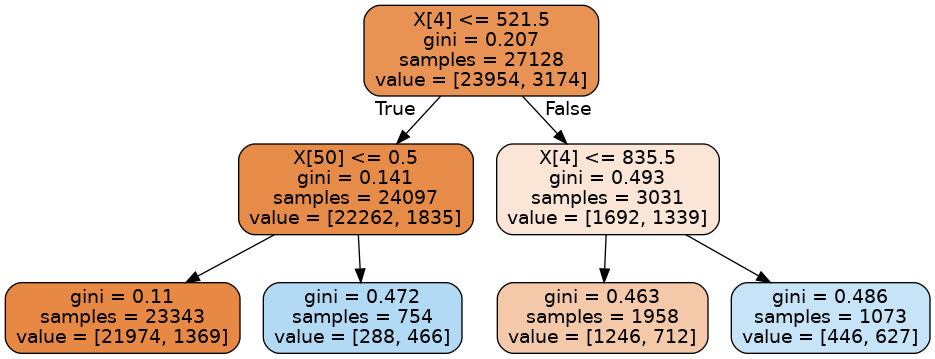

In [4]:
#可視化
dot_data = tree.export_graphviz(tree_model, out_file = None, filled = True, rounded = True)
graph = pdp.graph_from_dot_data(dot_data)
Image(graph.create_png())

## 予測データに決定木モデルを適用

In [5]:
#モデルの当てはめ
test_dummy = pd.get_dummies(test)
pred_test = tree_model.predict(test_dummy)

#submitの形式で出力(CSV)
#データ加工
out = pd.DataFrame({'id':test_dummy['id'],
                   'y':pred_test})
#出力
out.to_csv("../../data/bank/submit/submit_1004_1_rpart.csv", header=False, index=False)